<a href="https://colab.research.google.com/github/ATIK2110018/ML_projects/blob/main/feni_flood_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df=pd.read_csv("/content/drive/MyDrive/GIS data/feni_flood_research/df_5000.csv")

In [32]:
df.shape

(5000, 12)

In [33]:
df.head()

,elevation,precipitation,lulc,flow_dir,flow_accu,slope,twi,ndvi,permeability,river_dist,drainage_den,flood
0,10.0,218.342468,2.0,16.0,0.0,0.350566,4.291700,0.493467,373.500000,30.00000,0.000000,1.0
1,9.0,166.048477,2.0,16.0,0.0,0.000000,4.291700,0.500000,375.700151,0.00000,5044.376465,0.0
2,9.0,218.342468,2.0,16.0,0.0,0.000000,4.291700,0.500000,373.500000,30.00000,0.000000,0.0
3,9.0,164.872559,3.0,1.0,5.0,2.888425,4.596104,0.659629,374.500000,1520.85498,0.000000,0.0
4,10.0,175.080338,2.0,32.0,3.0,2.452491,4.249122,0.605101,374.000000,360.00000,4179.003418,0.0


In [34]:
# df = df.rename(columns={'twi_1': 'drainage_den'})

In [35]:
df['twi']=df['twi'].fillna(0)
df['river_dist']=df['river_dist'].fillna(df['river_dist'].mean)
df['elevation']=df['elevation'].fillna(df['elevation'].mean)
df['precipitation']=df['precipitation'].fillna(df['precipitation'].mean)
df['lulc']=df['lulc'].fillna(1)
df['flow_dir']=df['flow_dir'].fillna(2)
df['slope']=df['slope'].fillna(df['slope'].mean)
df['flow_accu']=df['flow_accu'].fillna(df['flow_accu'].mean)
df['ndvi']=df['ndvi'].fillna(df['ndvi'].mean)
df['drainage_den']=df['drainage_den'].fillna(df['drainage_den'].mean)
df['flood']=df['flood'].fillna(0)

In [36]:
df.isnull().sum()

,0
elevation,0
precipitation,0
lulc,0
flow_dir,0
flow_accu,0
slope,0
twi,0
ndvi,0
permeability,0
river_dist,0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   elevation      5000 non-null   float64
 1   precipitation  5000 non-null   float64
 2   lulc           5000 non-null   float64
 3   flow_dir       5000 non-null   float64
 4   flow_accu      5000 non-null   float64
 5   slope          5000 non-null   float64
 6   twi            5000 non-null   float64
 7   ndvi           5000 non-null   float64
 8   permeability   5000 non-null   float64
 9   river_dist     5000 non-null   float64
 10  drainage_den   5000 non-null   float64
 11  flood          5000 non-null   float64
dtypes: float64(12)
memory usage: 468.9 KB


In [38]:
non_numeric_cols = df.select_dtypes(exclude=['number']).columns
print(non_numeric_cols)

for col in non_numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

for col in df.columns:
    df[col] = df[col].fillna(df[col].mean())

print(df.dtypes)

Index([], dtype='object')
elevation        float64
precipitation    float64
lulc             float64
flow_dir         float64
flow_accu        float64
slope            float64
twi              float64
ndvi             float64
permeability     float64
river_dist       float64
drainage_den     float64
flood            float64
dtype: object


In [39]:
# df.drop(columns=["CID", "POINT_X", "POINT_Y"], inplace=True)

In [40]:
df.head()

,elevation,precipitation,lulc,flow_dir,flow_accu,slope,twi,ndvi,permeability,river_dist,drainage_den,flood
0,10.0,218.342468,2.0,16.0,0.0,0.350566,4.291700,0.493467,373.500000,30.00000,0.000000,1.0
1,9.0,166.048477,2.0,16.0,0.0,0.000000,4.291700,0.500000,375.700151,0.00000,5044.376465,0.0
2,9.0,218.342468,2.0,16.0,0.0,0.000000,4.291700,0.500000,373.500000,30.00000,0.000000,0.0
3,9.0,164.872559,3.0,1.0,5.0,2.888425,4.596104,0.659629,374.500000,1520.85498,0.000000,0.0
4,10.0,175.080338,2.0,32.0,3.0,2.452491,4.249122,0.605101,374.000000,360.00000,4179.003418,0.0


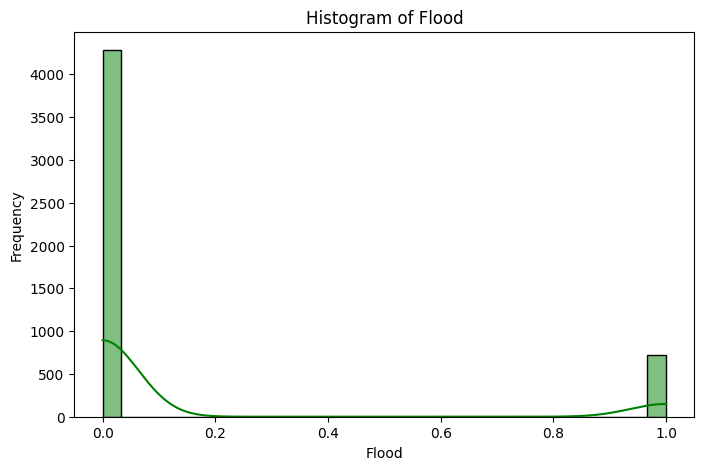

In [41]:
plt.figure(figsize=(8, 5))
sns.histplot(df['flood'], bins=30, kde=True, color='green')
plt.xlabel("Flood")
plt.ylabel("Frequency")
plt.title("Histogram of Flood")
plt.show()

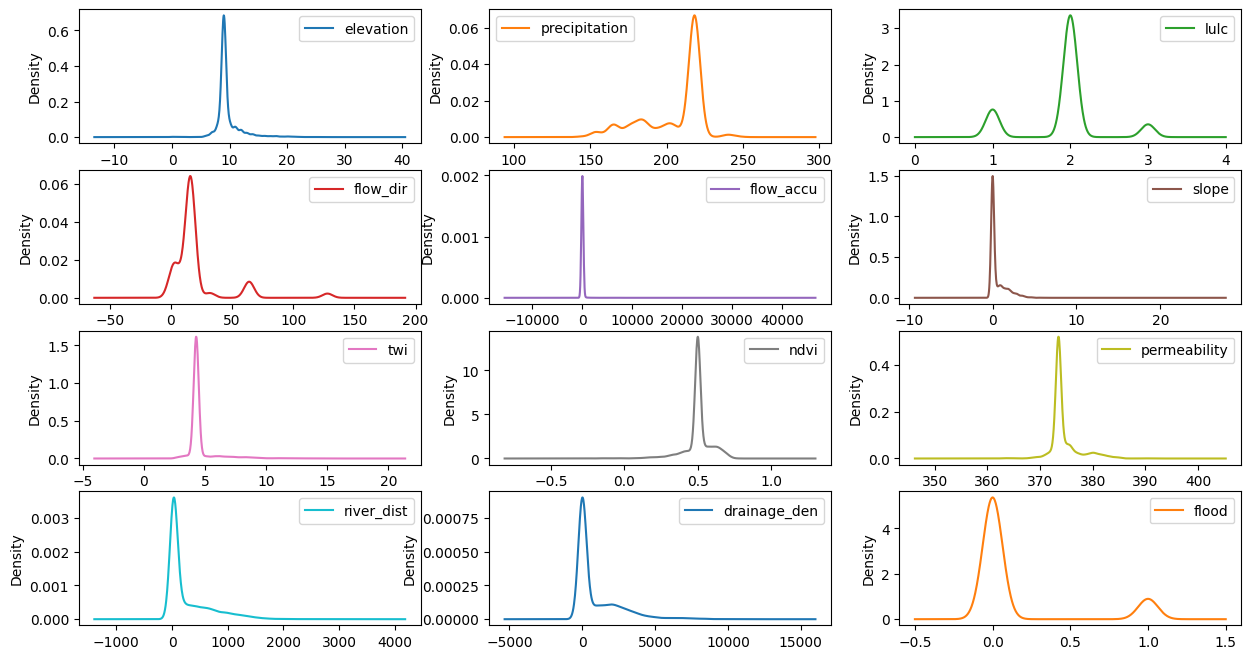

In [42]:
df.plot(kind='density',figsize=(15,8),subplots=True,layout=(4,3),sharex=False)
plt.show()

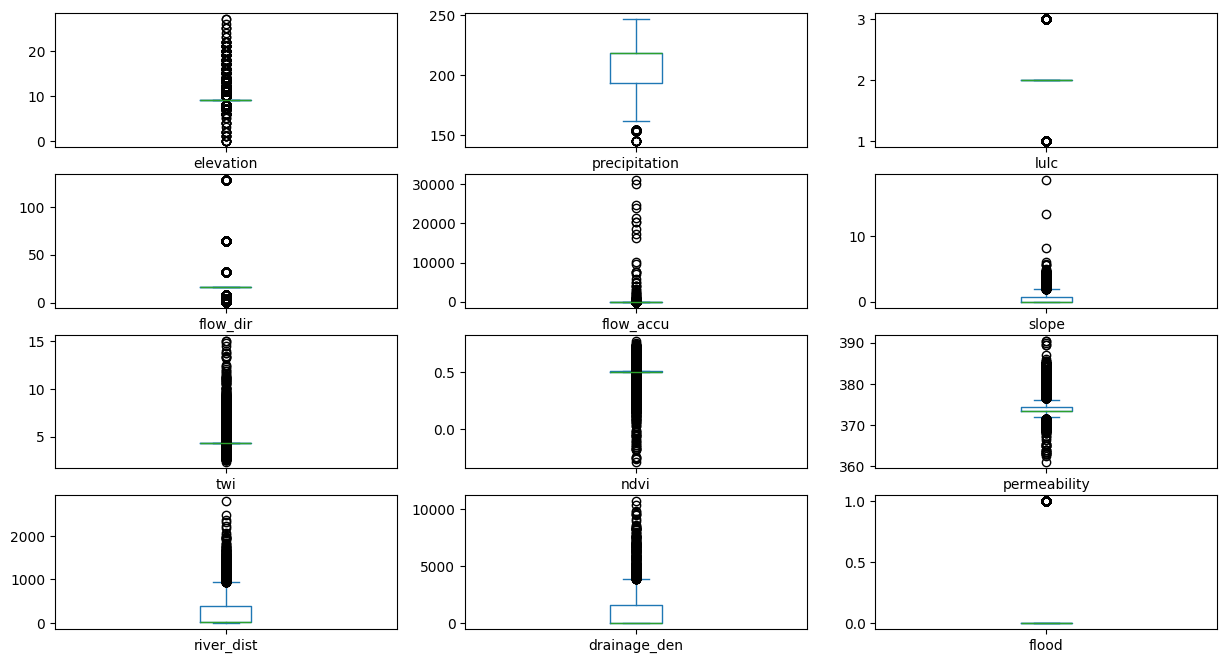

In [43]:
df.plot(kind='box',figsize=(15,8),subplots=True,layout=(4,3),sharex=False)
plt.show()

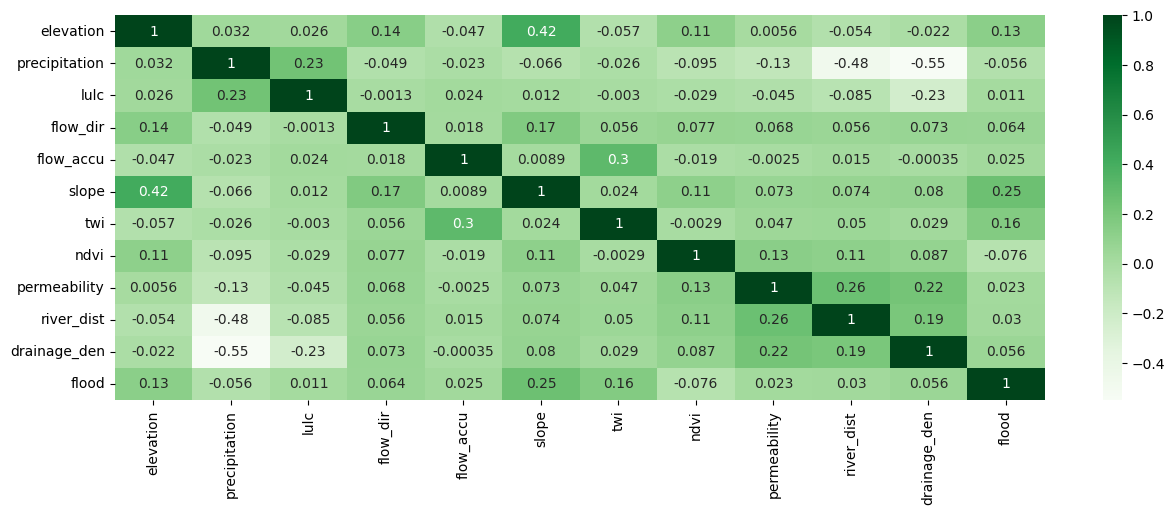

In [44]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True,cmap='Greens')
plt.show()

In [45]:
x = df.drop(columns=['flood'])

In [46]:
y=df['flood']

In [47]:
!pip install -q imbalanced-learn
from imblearn.over_sampling import SMOTE

In [48]:
smote = SMOTE(random_state=42)
x, y= smote.fit_resample(x, y)

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [51]:

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [52]:
model = Sequential([
    Dense(128, activation='relu', input_dim=11),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [53]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,905 (46.50 KB)

 Trainable params: 11,905 (46.50 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
from tensorflow.keras.metrics import AUC

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', AUC()])


In [55]:
callback=keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)


In [56]:

history=model.fit(x_train,y_train,epochs=500,validation_split=0.2,callbacks=callback)

Epoch 1/500
172/172 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.6703 - auc_1: 0.7105 - loss: 0.6296 - val_accuracy: 0.7841 - val_auc_1: 0.8256 - val_loss: 0.4907
Epoch 2/500
172/172 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7568 - auc_1: 0.8088 - loss: 0.5222 - val_accuracy: 0.8140 - val_auc_1: 0.8547 - val_loss: 0.4317
Epoch 3/500
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7929 - auc_1: 0.8380 - loss: 0.4611 - val_accuracy: 0.8257 - val_auc_1: 0.8743 - val_loss: 0.3994
Epoch 4/500
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8101 - auc_1: 0.8602 - loss: 0.4201 - val_accuracy: 0.8301 - val_auc_1: 0.8815 - val_loss: 0.3841
Epoch 5/500
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8125 - auc_1: 0.8647 - loss: 0.4074 - val_accuracy: 0.8373 - val_auc_1: 0.8858 - val_loss: 0.3826
Epoch 6/500
172/172 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8225 - auc_1: 0.8696 - loss: 0.3960 - val_accuracy: 0.8388 - val_auc_1: 0.8882 - val_loss: 0.3700
Epoch 7

In [57]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Convert predictions to binary labels using a threshold (e.g., 0.5)
y_pred_binary = (model.predict(x_test) > 0.5).astype(int)

print("📋 Classification Report:")
print(classification_report(y_test, y_pred_binary))  # Use y_pred_binary here

print("\n📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_binary))


54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
📋 Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.74      0.84       850
         1.0       0.79      0.98      0.88       864

    accuracy                           0.86      1714
   macro avg       0.88      0.86      0.86      1714
weighted avg       0.88      0.86      0.86      1714


📊 Confusion Matrix:
[[630 220]
 [ 16 848]]


54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
AUC Score: 0.915484068627451


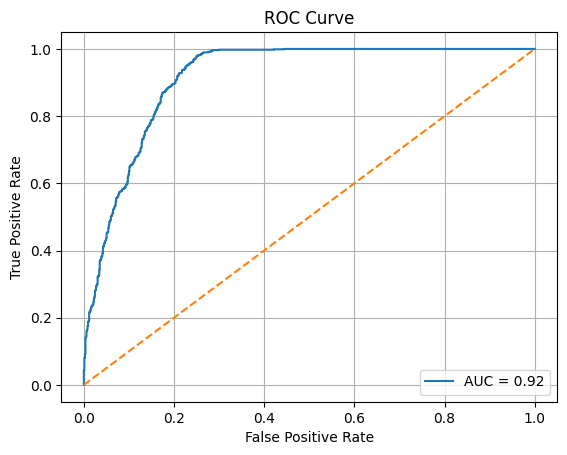

In [58]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predict probabilities
y_pred_prob = model.predict(x_test).ravel()

# AUC score
auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC Score: {auc}")

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


In [59]:
data=pd.read_csv('/content/drive/MyDrive/GIS data/feni_flood_research/dataset.csv')

In [60]:
data.head()

,elevation,precipitation,lulc,flow_dir,flow_accu,slope,twi,ndvi,permeability,river_dist,drainage_den,flood
0,9.0,218.342468,2.0,16.0,0.0,0.0,4.2917,0.5,373.5,30.0,0.0,0.0
1,9.0,218.342468,2.0,16.0,0.0,0.0,4.2917,0.5,373.5,30.0,0.0,0.0
2,9.0,218.342468,2.0,16.0,0.0,0.0,4.2917,0.5,373.5,30.0,0.0,0.0
3,9.0,218.342468,2.0,16.0,0.0,0.0,4.2917,0.5,373.5,30.0,0.0,0.0
4,9.0,218.342468,2.0,16.0,0.0,0.0,4.2917,0.5,373.5,30.0,0.0,0.0


In [61]:
data=data.drop(columns=['flood'],axis=1)

In [62]:
data.head()

,elevation,precipitation,lulc,flow_dir,flow_accu,slope,twi,ndvi,permeability,river_dist,drainage_den
0,9.0,218.342468,2.0,16.0,0.0,0.0,4.2917,0.5,373.5,30.0,0.0
1,9.0,218.342468,2.0,16.0,0.0,0.0,4.2917,0.5,373.5,30.0,0.0
2,9.0,218.342468,2.0,16.0,0.0,0.0,4.2917,0.5,373.5,30.0,0.0
3,9.0,218.342468,2.0,16.0,0.0,0.0,4.2917,0.5,373.5,30.0,0.0
4,9.0,218.342468,2.0,16.0,0.0,0.0,4.2917,0.5,373.5,30.0,0.0


In [63]:
data.isnull().sum()

,0
elevation,0
precipitation,0
lulc,0
flow_dir,0
flow_accu,0
slope,0
twi,0
ndvi,0
permeability,0
river_dist,0


In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(data)

In [65]:
predictions=model.predict(data)

71790/71790 ━━━━━━━━━━━━━━━━━━━━ 100s 1ms/step


In [66]:
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 74.7 MB/s eta 0:00:00


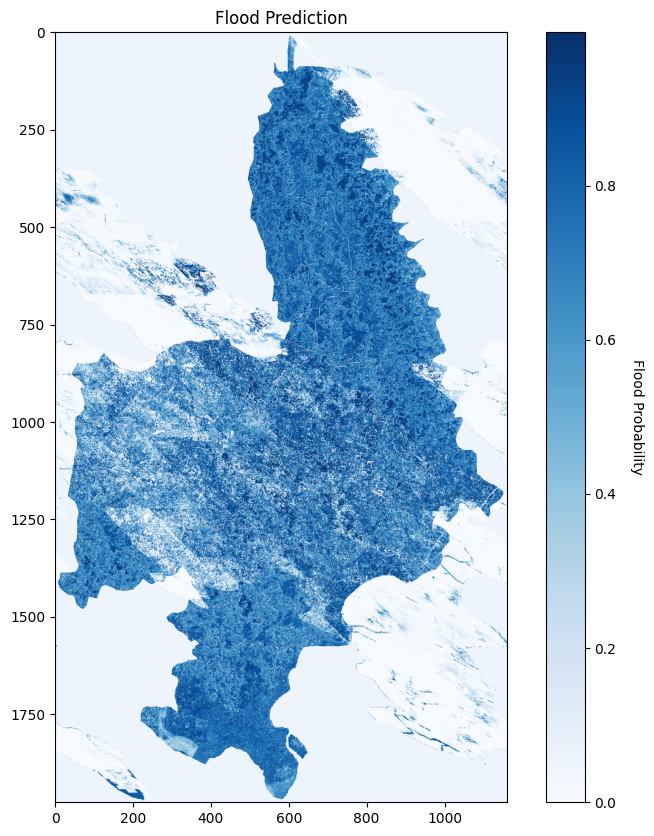

In [67]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

with rasterio.open('/content/drive/MyDrive/GIS data/feni_flood_research/tif/flood.tif') as src:
    rows, cols = src.height, src.width
    crs = src.crs
    transform = src.transform

total_elements = predictions.shape[0]
flood_probabilities = predictions[:, 0]
prediction_image = flood_probabilities.reshape((rows, cols))

profile = {
    'driver': 'GTiff',
    'count': 1,
    'dtype': rasterio.float32,
    'crs': crs,
    'transform': transform,
    'width': cols,
    'height': rows
}

with rasterio.open('raster.tif', 'w', **profile) as dst:
    dst.write(prediction_image.astype(rasterio.float32), 1)

with rasterio.open('raster.tif') as src:
    image_data = src.read(1)
    fig, ax = plt.subplots(figsize=(10, 10))
    im = ax.imshow(image_data, cmap='Blues')
    cbar = fig.colorbar(im, ax=ax, orientation='vertical')
    cbar.set_label('Flood Probability', rotation=270, labelpad=20)
    plt.title('Flood Prediction')
    plt.show()